In [1]:
from fastai import *
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import html
import fastai

In [2]:
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)
random.seed(1)
torch.backends.cudnn.deterministic=True

In [3]:
# Check that the latest 1.0.0 build of PyTorch has been installed 
# alongside fastai
import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

Cuda available
PyTorch version:  1.0.0.dev20190320


In [4]:
PATH=Path('/home/dell/Code/fastai_examples/pubmed-rct-200k/')
PATH.mkdir(exist_ok=True)
DATA_PATH=Path('/home/dell/Code/fastai_examples/data/pubmed-rct-200k')
DATA_PATH.mkdir(exist_ok=True)

In [5]:
#path = untar_data("http://files.fast.ai/data/examples/imdb_sample.tgz",dest=DATA_PATH)
#path = Path('/home/dell/Code/fastai_examples/data/imdb_sample/')

In [63]:
dataProcess = False
modelTrain = True

In [64]:
if dataProcess:
    testData = pd.read_csv(DATA_PATH/'test.txt', sep="\t", header=None, comment='#')
    testData.columns = ["label", "text"]
    testData.dropna(inplace=True)
    testData.head()

In [65]:
if dataProcess:
    trainData = pd.read_csv(DATA_PATH/'train.txt', sep="\t", header=None, comment='#')
    trainData.columns = ["label", "text"]
    trainData.dropna(inplace=True)
    trainData.head()

In [66]:
import pixiedust

In [67]:
#%%pixie_debugger

if dataProcess:
  # Language model data
  data_lm = TextLMDataBunch.from_df(PATH,train_df=trainData, valid_df = testData)
  data_lm.save(PATH/'data_lm_export.pkl')
  # Classifier model data
  data_clas = TextClasDataBunch.from_df(PATH, train_df=trainData,valid_df = testData , \
                                        vocab=data_lm.train_ds.vocab, bs=32)
  data_clas.save(PATH/'data_clas_export.pkl')
else:
  data_lm = load_data(PATH, file='data_lm_export.pkl')
  data_clas = load_data(PATH, file='data_clas_export.pkl', bs=16)

/home/dell/anaconda3/lib/python3.7/site-packages/torch/serialization.py:452: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


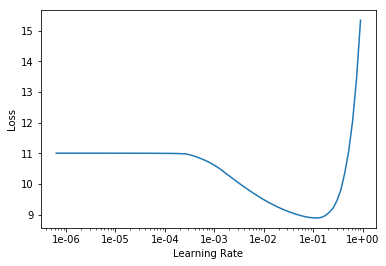

In [68]:
if modelTrain:
    learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, pretrained=False)
    learn.lr_find()
    learn.recorder.plot()

In [69]:
if modelTrain:
    preTrainedWt103Path = Path('/home/dell/Code/fastai_examples/data/models/wt103')
    learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, pretrained=False)
    learn.load_pretrained(wgts_fname = preTrainedWt103Path/'fwd_wt103.h5', itos_fname = preTrainedWt103Path/'itos_wt103.pkl', strict=False )
    learn.fit_one_cycle(1, 1e-2)
    pathModel = learn.save(PATH/"trained_model_pubmed_ep1")
else:
    learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, pretrained=False)
    learn.load(PATH/"trained_model_pubmed_ep1")

epoch,train_loss,valid_loss,accuracy,time
0,3.204423,3.094609,0.439030,55:36


In [70]:
print(fastai.__version__)

1.0.52.dev0


In [71]:
#%%pixie_debugger
#learn.predict("TP53 is an important gene ", n_words=30)

In [72]:
x_inp = ["i like apples",
         "i want to buy some apples",
         "where is your cell phone"]

In [73]:
x_inp2 = ["i like apples and oranges",
         "i hate all fruits especially apples and oranges",
         "i am going to buy some apples and oranges"]

In [74]:
x_inp3 = ["let's talk about fruits for a second. Apples are nice. Oranges too. I kinda like them.",
         "i compared the prices of apples and oranges at walmart and kroger stores",
         "oh you wanna talk about apples. sure. i am not sure if i have said this before but i do like them and oranges."]

In [91]:
x_inp4 = ["acupuncture has no systemic hazard for pregnancy",
         "anxiety might have harmful effects for pregnancy",
         "anxiety is bad for pregnancy"]

In [92]:
x_inp5 = ["protein",
         "gene",
         "cell",
         "asthma",
         "lung"]

In [191]:
'''
P53 and CDKN1A together in TP53 pathway
CDKN1A and CREB3 together in Parathyroid hormone synthesis, secretion and action pathway
'''

x_inp6_names = ["P53", "CDKN1A", "Myoglobin", "CREB3","Myosin-10", "PPP1R12A"]

x_inp6 = ["Acts as a tumor suppressor in many tumor types; induces\
   growth arrest or apoptosis depending on the physiological\
   circumstances and cell type. Involved in cell cycle regulation as\
   a trans-activator that acts to negatively regulate cell division\
   by controlling a set of genes required for this process. One of\
   the activated genes is an inhibitor of cyclin-dependent kinases.\
   Apoptosis induction seems to be mediated either by stimulation of\
   BAX and FAS antigen expression, or by repression of Bcl-2\
   expression. In cooperation with mitochondrial PPIF is involved in\
   activating oxidative stress-induced necrosis; the function is\
   largely independent of transcription. Induces the transcription of\
   long intergenic non-coding RNA p21 (lincRNA-p21) and lincRNA-\
   Mkln1. LincRNA-p21 participates in TP53-dependent transcriptional\
   repression leading to apoptosis and seems to have an effect on\
   cell-cycle regulation. Implicated in Notch signaling cross-over.\
   Prevents CDK7 kinase activity when associated to CAK complex in\
   response to DNA damage, thus stopping cell cycle progression.\
   Isoform 2 enhances the transactivation activity of isoform 1 from\
   some but not all TP53-inducible promoters. Isoform 4 suppresses\
   transactivation activity and impairs growth suppression mediated\
   by isoform 1. Isoform 7 inhibits isoform 1-mediated apoptosis.\
   Regulates the circadian clock by repressing CLOCK-ARNTL/BMAL1-\
   mediated transcriptional activation of PER2",
         
"May be involved in p53/TP53 mediated inhibition of\
   cellular proliferation in response to DNA damage. Binds to and\
   inhibits cyclin-dependent kinase activity, preventing\
   phosphorylation of critical cyclin-dependent kinase substrates and\
   blocking cell cycle progression. Functions in the nuclear\
   localization and assembly of cyclin D-CDK4 complex and promotes\
   its kinase activity towards RB1. At higher stoichiometric ratios,\
   inhibits the kinase activity of the cyclin D-CDK4 complex.\
   Inhibits DNA synthesis by DNA polymerase delta by competing with\
   POLD3 for PCNA binding "   ,
          
"Serves as a reserve supply of oxygen and facilitates the\
   movement of oxygen within muscles.",
          
          "Endoplasmic reticulum (ER)-bound sequence-specific\
   transcription factor that directly binds DNA and activates\
   transcription . Plays a role in the unfolded\
   protein response (UPR), promoting cell survival versus ER stress-\
   induced apoptotic cell death .\
   Also involved in cell proliferation, migration and\
   differentiation, tumor suppression and inflammatory gene\
   expression. Acts as a positive regulator of LKN-1/CCL15-induced\
   chemotaxis signaling of leukocyte cell migration . Associates with chromatin to\
   the HERPUD1 promoter . Also induces\
   transcriptional activation of chemokine receptors"
         ,
          
          "Cellular myosin that appears to play a role in\
cytokinesis, cell shape, and specialized functions such as\
secretion and capping. During cell spreading, plays an important\
role in cytoskeleton reorganization, focal contacts formation (in\
the margins but not the central part of spreading cells), and\
lamellipodial retraction; this function is mechanically\
antagonized by MYH9. ",
          
          "Key regulator of protein phosphatase 1C (PPP1C).\
  Mediates binding to myosin. As part of the PPP1C complex, involved\
     in dephosphorylation of PLK1. Capable of inhibiting HIF1AN-\
     dependent suppression of HIF1A activity."
          
         ]


In [192]:
similarity_test_input = x_inp6
similarity_test_input_names = x_inp6_names

In [193]:
import multiprocessing

n_cpu = multiprocessing.cpu_count()


In [194]:
tok = Tokenizer().process_all(partition_by_cores(similarity_test_input,n_cpu-1))

In [195]:
X = [[data_lm.vocab.stoi[o1] for o1 in o if data_lm.vocab.stoi[o1] != 0] for o in tok];

In [196]:
m = learn.model.train()

In [197]:
m[0]

AWD_LSTM(
  (encoder): Embedding(60003, 400, padding_idx=1)
  (encoder_dp): EmbeddingDropout(
    (emb): Embedding(60003, 400, padding_idx=1)
  )
  (rnns): ModuleList(
    (0): WeightDropout(
      (module): LSTM(400, 1150, batch_first=True)
    )
    (1): WeightDropout(
      (module): LSTM(1150, 1150, batch_first=True)
    )
    (2): WeightDropout(
      (module): LSTM(1150, 400, batch_first=True)
    )
  )
  (input_dp): RNNDropout()
  (hidden_dps): ModuleList(
    (0): RNNDropout()
    (1): RNNDropout()
    (2): RNNDropout()
  )
)

In [224]:
#%%pixie_debugger
# Set batch size to 1
m[0].bs=1
# Turn off dropout
m.eval()
# Reset hidden state
m.reset()

embeddings = []
with torch.no_grad():
    for sentence in X:
        #resizeLength = len(x_inp4)
        resizeLength = len(sentence[2:-2])
        input_sentence = tensor(sentence[2:-2])
        input_sentence.resize_(resizeLength,1)
        # sentence encoding 400 dims. -1 is the last element that's supposed to have the final encoded state
        tmpEmbded = m[0](input_sentence.cuda())
        embeddings.append(tmpEmbded[0][2].mean(0)[-1])

In [225]:
#kk0=m[0](input0.cuda())
#kk1=m[0](input1.cuda())
#kk2=m[0](input2.cuda())
#kk3=m[0](input3.cuda())

In [226]:
#kk0 = (kk0[0][2][0][-1]) # 1st sentence encoding 400 dims. -1 is the last element that's supposed to have the final encoded state
#kk1 = (kk1[0][2][0][-1]) # 2nd sentence encoding 400 dims
#kk2 = (kk2[0][2][0][-1]) # 3rd sentence encoding 400 dims
#kk3 = (kk3[0][2][0][-1]) # 4rd sentence encoding 400 dims

In [227]:
# cosine similarity - to check quality of our sentence encoder
def cos_sim(v1,v2):
    return F.cosine_similarity(tensor(v1).unsqueeze(0),tensor(v2).unsqueeze(0)).mean()

In [228]:
similarity_test_input_names

['P53', 'CDKN1A', 'Myoglobin', 'CREB3', 'Myosin-10', 'PPP1R12A']

In [230]:
'''
P53 and CDKN1A together in TP53 pathway
CDKN1A and CREB3 together in Parathyroid hormone synthesis, secretion and action pathway
Myosin-10 and PPP1R12A together in Regulation of actin cytoskeleton pathway

Peroxidative interaction of myoglobin and myosin discovered

CREB3 interaction with  RPRM	reprimo, TP53 dependent G2 arrest mediator candidate discovered
'''

for i in range(len(embeddings)):
    for j in range(len(embeddings)):
        print(similarity_test_input_names[i] + "... with .... " + similarity_test_input_names[j])
        print(cos_sim(embeddings[i],embeddings[j]).item())
    print("\n")



P53... with .... P53
1.0
P53... with .... CDKN1A
0.9022861123085022
P53... with .... Myoglobin
0.45885705947875977
P53... with .... CREB3
0.926720142364502
P53... with .... Myosin-10
0.7897999286651611
P53... with .... PPP1R12A
0.6927043199539185


CDKN1A... with .... P53
0.9022861123085022
CDKN1A... with .... CDKN1A
1.0
CDKN1A... with .... Myoglobin
0.2922537922859192
CDKN1A... with .... CREB3
0.9114949703216553
CDKN1A... with .... Myosin-10
0.6531807780265808
CDKN1A... with .... PPP1R12A
0.7770805358886719


Myoglobin... with .... P53
0.45885705947875977
Myoglobin... with .... CDKN1A
0.2922537922859192
Myoglobin... with .... Myoglobin
1.0
Myoglobin... with .... CREB3
0.3669407367706299
Myoglobin... with .... Myosin-10
0.5181853175163269
Myoglobin... with .... PPP1R12A
0.18204271793365479


CREB3... with .... P53
0.926720142364502
CREB3... with .... CDKN1A
0.9114949703216553
CREB3... with .... Myoglobin
0.3669407367706299
CREB3... with .... CREB3
1.0
CREB3... with .... Myosin-10
0.764